# **AP157 Machine Learning Lab Assignment**
### Module B1: Digital Image Formation and Enhancement

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Parts 1 and 2 are worth 20 and 80 points, respectively).

_Credits_: This lab assignment is based on the AP157 modules of Dr. Maricor Soriano and scripts created by Mr. Rene Principe

### Student Information

_Full Name (Last Name, First Name)_: \
_Student No._:\
_Section_:

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:**

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/30
* Part 2 - []/30
* Part 3 - []/40

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

In [147]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#### PART 1 - Create synthetic greyscale images *(30 points)*

Simulate a 1 cm x 1 cm optical element with a sinusoid along the x-direction with a given frequency-- generate images with frequencies of 1, 3, and 5 cycles/cm. The size of each image should be 400x400 pixels.

For each frequency, show the:
1. [15 pts.; 5 pts. each] Image heatmap (range of pixel values should be between 0 to 255)
2. [15 pts.; 5 pts. each] Plot showing 3-D view



Sample output for frequency of 5 cycles/cm is uploaded to the Google Drive Datasets folder: https://drive.google.com/file/d/1770FiH4FPm0C_fCpRGorr64x-RIv9UOY/view?usp=drive_link



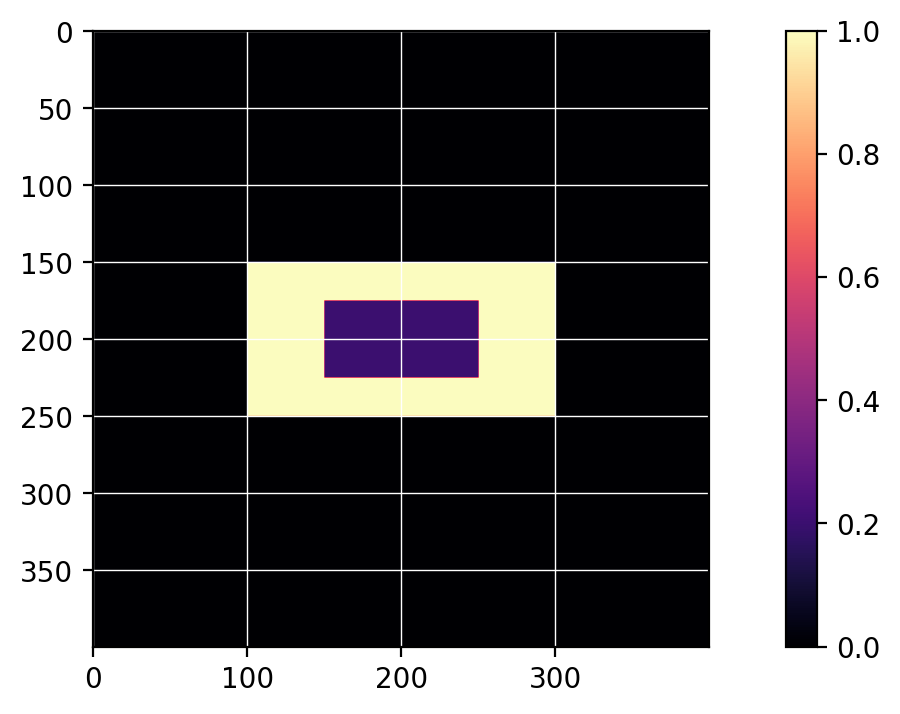

In [148]:
N = 400

xx = np.linspace(-1, 1, N)
X, Y = np.meshgrid(xx, xx)
N = 400 #defines the image resolution, computationally efficient if set to 2^N

# Create grid
xx = np.linspace(-1, 1, N)
X, Y = np.meshgrid(xx, xx) # both X and Y are NxN arrays with X and Y coordinates from [-1,1] centered at (0,0)
canvas = np.zeros_like(X)
length = 100
width = 200
rect = np.zeros_like(canvas)
minlen = 200-(length/2)
maxlen = 200+(length/2)
minwid = 200-(width/2)
maxwid = 200+(width/2)
minlen1 = 200-(length/4)
maxlen1 = 200+(length/4)
minwid1 = 200-(width/4)
maxwid1 = 200+(width/4)
rect[int(minlen):int(maxlen), int(minwid):int(maxwid)] = 1.0
rect[int(minlen1):int(maxlen1), int(minwid1):int(maxwid1)] = 0.2

cmap = "magma"

# Create a 2D flat view and a 3D view of a synthetically generated circle
fig = plt.figure(figsize=(10, 4), dpi=200)

plt.imshow(rect, cmap=cmap)
plt.colorbar()  # Add colorbar to check pixel values
plt.grid(color='white', linewidth=0.5)  # Add grid

(0.0, 20.0)

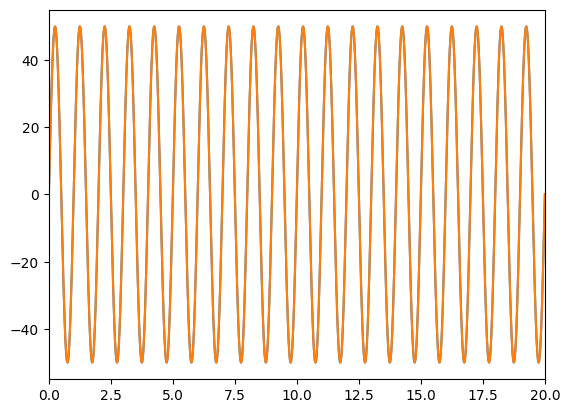

In [149]:
N = 400

xx = np.linspace(-1, 1, N)
X, Y = np.meshgrid(xx, xx)
N = 400 #defines the image resolution, computationally efficient if set to 2^N

# Create grid
xx = np.linspace(-1, 1, N)
X, Y = np.meshgrid(xx, xx) # both X and Y are NxN arrays with X and Y coordinates from [-1,1] centered at (0,0)
canvas = np.zeros_like(X)

amp = 50
freq = np.linspace(0, 100, 100000)
sine = amp*np.sin(2*np.pi*freq)
freq2 = np.linspace(0,400,1_000_000)
sine2 = amp*np.sin(2*np.pi*freq2)
x = np.linspace(0, 399, 400)
plt.plot(freq, sine)
plt.plot(freq2,sine2)
plt.xlim(0,20)

In [150]:
def annulus(Color, R, X, x, Y, y, i, o):
    R = np.sqrt((X + x)**2 + (Y/2 + y/2)**2)
    i = i
    o = o
    Color[np.where((R < i) & (R > o))] = 0
    return Color

#### PART 2 - Create color images *(30 points)*

Recreate the Olympics logo as an image. It is fine if the colors overlap where the rings intersect.

Sample output is uploaded to the Google Drive Datasets folder: https://drive.google.com/file/d/1770FiH4FPm0C_fCpRGorr64x-RIv9UOY/view?usp=drive_link

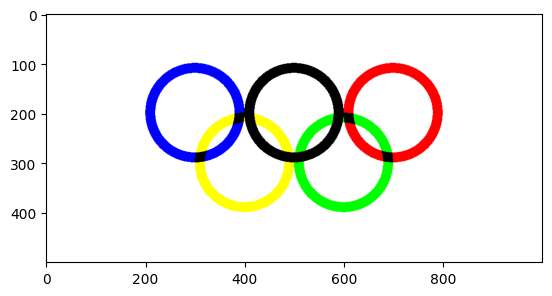

In [154]:
M = 1000
N = 500
xx = np.linspace(-1, 1, N)
yy = np.linspace(-1, 1, M)
X1, Y1 = np.meshgrid(yy, xx)
#defines the image resolution, computationally efficient if set to 2^N

red, grn, blu = np.zeros((N, M)), np.zeros((N, M)), np.zeros((N, M))
hori, bot = 0.2, 0.2
rad1 = 0.2
rad2 = 0.160
rgb = np.zeros((N, M, 3))
rgb[:, :, 0] = red
rgb[:, :, 1] = grn
rgb[:, :, 2] = blu
rgb[np.where((red == 0) & (grn == 0) & (blu == 0))] = 1
red = annulus(rgb[:,:,0], rad1, X1, -hori, Y1, -bot, rad1, rad2) + annulus(rgb[:,:,0], rad1, X1, 2*hori, Y1, bot, rad1, rad2)
rgb = annulus(rgb, rad1, X1, 0, Y1, bot, rad1, rad2)
grn = annulus(rgb[:, :, 1], rad1, X1, -2*hori, Y1, bot, rad1, rad2) + annulus(rgb[:,:,1], rad1, X1, 2*hori, Y1, bot, rad1, rad2)
blu = annulus(rgb[:, :, 2], rad1, X1, -2*hori, Y1, bot, rad1, rad2) + annulus(rgb[:,:,2], rad1, X1, hori, Y1, -bot, rad1, rad2) + annulus(rgb[:,:,2], rad1, X1, -hori, Y1, -bot, rad1, rad2)
# Create grid
canvas1 = np.zeros_like(X1)
plt.imshow(rgb)
plt.show()


(512, 512)


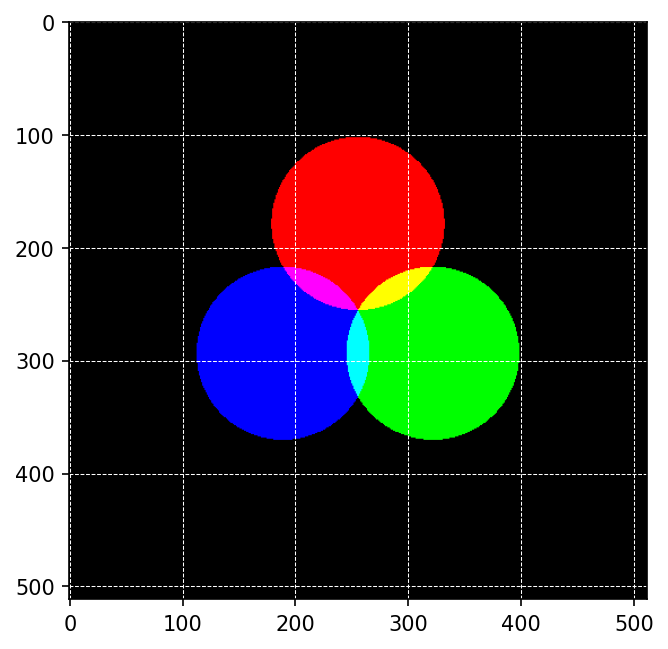

In [152]:
# Define the number of points along x and create a meshgrid
N = 512
x = np.linspace(-10, 10, num=N)
y = x
X, Y = np.meshgrid(x, y)

# Initialize arrays for red, green, and blue channels
Rd, Gn, Bl = np.zeros((N, N)), np.zeros((N, N)), np.zeros((N, N))

# Draw colored circles
Rt, Rc, deg = 3, 3, 30

# Calculate the coordinates of the center of the colored circles
xt, yt = Rt * np.cos(deg * np.pi / 180), Rt * np.sin(deg * np.pi / 180)

# Calculate the distance from each point to the center of each circle and set color channels
R = np.sqrt((X) ** 2 + (Y + Rt) ** 2)
Rd[np.where(R < Rc)] = 1.0

R = np.sqrt((X - xt) ** 2 + (Y - yt) ** 2)
Gn[np.where(R < Rc)] = 1.0

R = np.sqrt((X + xt) ** 2 + (Y - yt) ** 2)
Bl[np.where(R < Rc)] = 1.0

# Create a 3D array to represent the RGB image
I_rgb = np.zeros((N, N, 3))
I_rgb[..., 0] = Rd
I_rgb[..., 1] = Gn
I_rgb[..., 2] = Bl

# Plot the RGB image
print(Rd.shape)
plt.figure(figsize=(5, 5), dpi=150)
plt.grid(color='white', linestyle='--', linewidth=0.5)  # Add grid
plt.imshow(I_rgb)
plt.show()

#### PART 3 - Apply image enhancement *(40 points)*

Apply contrast stretching to an astronaut image.

Show the following:
1. [20 pts.] Original and contrast-stretched image
2. [10 pts.] Probability Distribution Function (PDF) plot showing curves for the original and contrast-stretched image
3. [10 pts.] Cumulative Distribution Function (CDF) plot showing curves for the original and contrast-stretched image

Sample output is uploaded to the Google Drive Datasets folder: https://drive.google.com/file/d/12-cPwAr7hVUPBKIthvcQgvqjvEOmwyxJ/view?usp=drive_link

First step is to load the image-- available from the scikit-image (skimage) library-- and make a low-contrast version, using the code below:

In [153]:
from skimage import color, data, exposure
from skimage.transform import rescale

img = color.rgb2gray(data.astronaut())*256 # original astronaut image
plt.figure(figsize=(10,5), dpi = 200)
plt.subplot(121)
plt.imshow(img, cmap = 'gray', vmax = 255)
plt.colorbar()

img_low_contrast = img/5 # low contrast astronaut image
plt.subplot(122)
plt.imshow(img_low_contrast, cmap = 'gray', vmax = 255)
plt.colorbar()

ModuleNotFoundError: No module named 'skimage'

Next, write your code to apply contrast stretching, calculate the PDF and CDF of the original and contrast-stretched images. Finally, display the images and PDF and CDF plots.